# Testing HOTS algorithm on N-MNIST dataset

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
import pickle
from mix_Network import *

## 1. Testing HOTS on N-MNIST with Lagorce 2017 methodology

- loading 15 random digits instead of 3 cycles with 5 digits for learning clusters

In [5]:
hots = network(krnlinit='rdn')
loader = hots.learning1by1(filtering='all')

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 15/15 [01:57<00:00,  7.81s/it]


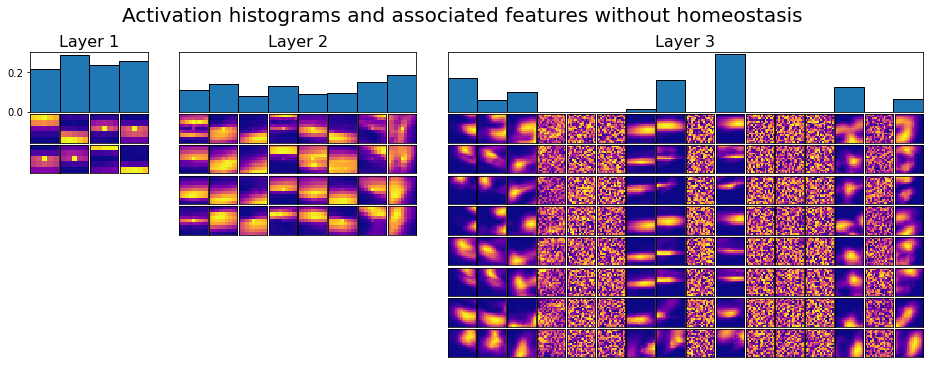

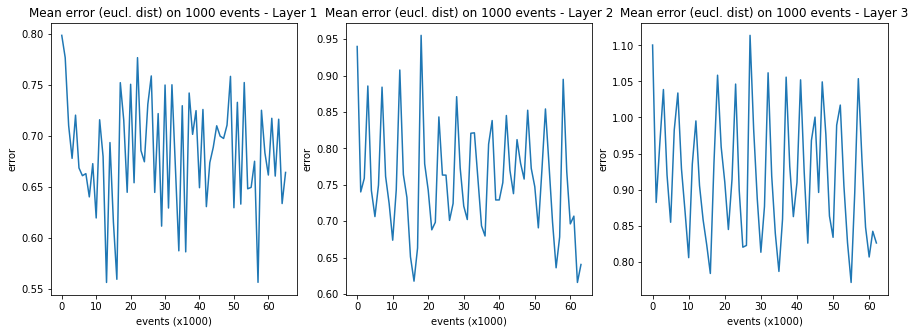

In [6]:
hots.plotlayer()
hots.plotconv()

In [7]:
trainmap, loader = hots.training(loader)

100%|██████████| 40/40 [05:15<00:00,  7.89s/it]


In [8]:
testmap, loader = hots.testing(loader, trainmap)

100%|██████████| 40/40 [04:38<00:00,  6.97s/it]


bhatta:20.0% - eucli:20.0% - norm:20.0%


### Adding Homeostasis

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 15/15 [02:02<00:00,  8.16s/it]


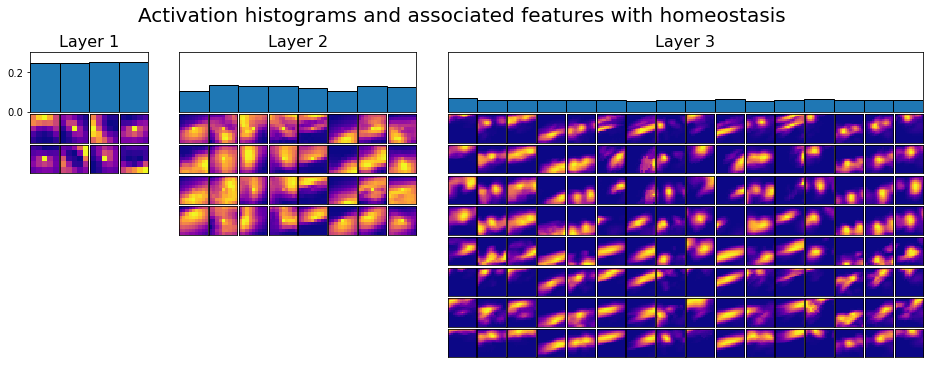

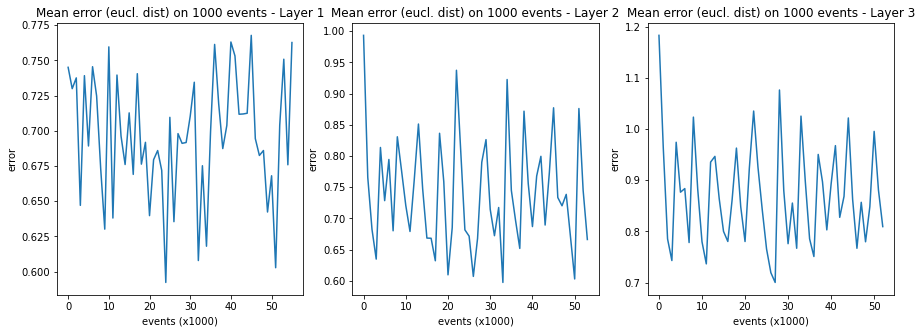

In [10]:
homhots = network(krnlinit='rdn', homeo=True)
loaderhom = homhots.learning1by1(filtering='all')
homhots.plotlayer()
homhots.plotconv()

In [11]:
trainmaphom, loaderhom = homhots.training(loaderhom)
testmaphom, loaderhom = homhots.testing(loaderhom, trainmaphom)

100%|██████████| 40/40 [05:24<00:00,  8.11s/it]


bhatta:7.5% - eucli:10.0% - norm:12.5%


test: tensor([5])
train: tensor([8])
test: tensor([2])
train: tensor([0])
test: tensor([1])
train: tensor([8])
test: tensor([1])
train: tensor([3])
test: tensor([6])
train: tensor([0])
test: tensor([4])
train: tensor([0])
test: tensor([7])
train: tensor([4])
test: tensor([3])
train: tensor([5])
test: tensor([8])
train: tensor([2])
test: tensor([0])
train: tensor([7])
test: tensor([8])
train: tensor([4])
test: tensor([1])
train: tensor([5])
test: tensor([4])
train: tensor([4])
test: tensor([9])
train: tensor([8])
test: tensor([1])
train: tensor([2])
test: tensor([5])
train: tensor([9])
test: tensor([6])
train: tensor([9])
test: tensor([5])
train: tensor([7])
test: tensor([2])
train: tensor([8])
test: tensor([2])
train: tensor([2])
test: tensor([4])
train: tensor([8])
test: tensor([2])
train: tensor([5])
test: tensor([4])
train: tensor([7])
test: tensor([3])
train: tensor([2])
test: tensor([7])
train: tensor([7])
test: tensor([7])
train: tensor([2])
test: tensor([3])
train: tensor([2])
t

## Testing Maro 

In [ ]:
method = 'maro'
hom = False
homrun = False

L1 = ClusteringLayer(
    tau=tau,
    R=R,
    verbose=0,
    ThrFilter=filthr,
    LearningAlgo=method,
    kernel=decay,
    homeo=hom
)
L2 = ClusteringLayer(
    tau=10 * tau,
    R=2 * R,
    verbose=0,
    ThrFilter=filthr,
    LearningAlgo=method,
    kernel=decay,
    homeo=hom
)
L3 = ClusteringLayer(
    tau=10 * 10 * tau,
    R=2 * 2 * R,
    verbose=0,
    ThrFilter=filthr,
    LearningAlgo=method,
    kernel=decay,
    homeo=hom
)
Net = Network([L1, L2, L3])

#timestr = time.strftime("%Y%m%d")
timestr = '20201021'

if hom==True:
    fname = 'Records/EXP_03_NMNIST/'+timestr+'_hots_'+str(tau*1000)+'ms_'+method+'_homeo.pkl'
else:
    fname = 'Records/EXP_03_NMNIST/'+timestr+'_hots_'+str(tau*1000)+'ms_'+method+'.pkl'

print(fname)

if not os.path.isfile(fname):
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(
        event=event_cl, NbClusterList=nb_cluster, to_record=True, NbCycle=1
    )
    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer)
    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer)

    Classif0 = Classifier(
        event0_o_tr, event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te
    )
    prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN,to_print=True)
    SaveObject([ClusterLayer, Classif0], fname)
else:
    ClusterLayer, Classif0 = LoadObject(fname)
    prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN,to_print=True)

In [ ]:
DisplaySurface2D(ClusterLayer[0].prototype, nb_polarities=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)

event_to_show, eventnul, eventnull, labelnul, labelnull = LoadNMNIST(
1, 0, 0, Path=DataPath, OutOnePolarity=False, ListPolarities=None, verbose=0)
Net.RunNetwork(event_to_show, NbClusterList=ClusterLayer, homrun=homrun)
mapL1 = GenerateActivationMap(Net.Layers[0].output, ClusterLayer[0])
DisplayActivationMap(mapL1, scale=2)
mapL2 = GenerateActivationMap(Net.Layers[1].output, ClusterLayer[1])
DisplayActivationMap(mapL2, scale=2)
mapL3 = GenerateActivationMap(Net.Layers[2].output, ClusterLayer[2])
DisplayActivationMap(mapL3, scale=2)

DisplayConvergence(ClusterLayer, to_display=["error", "histo"])

### Adding Homeostasis

In [ ]:
method = 'maro'
hom = True
homrun = True

L1 = ClusteringLayer(
    tau=tau,
    R=R,
    verbose=0,
    ThrFilter=filthr,
    LearningAlgo=method,
    kernel=decay,
    homeo=hom
)
L2 = ClusteringLayer(
    tau=10 * tau,
    R=2 * R,
    verbose=0,
    ThrFilter=filthr,
    LearningAlgo=method,
    kernel=decay,
    homeo=hom
)
L3 = ClusteringLayer(
    tau=10 * 10 * tau,
    R=2 * 2 * R,
    verbose=0,
    ThrFilter=filthr,
    LearningAlgo=method,
    kernel=decay,
    homeo=hom
)
Net = Network([L1, L2, L3])

#timestr = time.strftime("%Y%m%d")
timestr = '20201021'

if hom==True:
    fname = 'Records/EXP_03_NMNIST/'+timestr+'_hots_'+str(tau*1000)+'ms_'+method+'_homeo.pkl'
else:
    fname = 'Records/EXP_03_NMNIST/'+timestr+'_hots_'+str(tau*1000)+'ms_'+method+'.pkl'

print(fname)

if not os.path.isfile(fname):
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(
        event=event_cl, NbClusterList=nb_cluster, to_record=True, NbCycle=1
    )
    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer)
    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer)

    Classif0 = Classifier(
        event0_o_tr, event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te
    )
    prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN,to_print=True)
    SaveObject([ClusterLayer, Classif0], fname)
else:
    ClusterLayer, Classif0 = LoadObject(fname)
    prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN,to_print=True)

In [ ]:
DisplaySurface2D(ClusterLayer[0].prototype, nb_polarities=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)

event_to_show, eventnul, eventnull, labelnul, labelnull = LoadNMNIST(
1, 0, 0, Path=DataPath, OutOnePolarity=False, ListPolarities=None, verbose=0)
Net.RunNetwork(event_to_show, NbClusterList=ClusterLayer, homrun=homrun)
mapL1 = GenerateActivationMap(Net.Layers[0].output, ClusterLayer[0])
DisplayActivationMap(mapL1, scale=2)
mapL2 = GenerateActivationMap(Net.Layers[1].output, ClusterLayer[1])
DisplayActivationMap(mapL2, scale=2)
mapL3 = GenerateActivationMap(Net.Layers[2].output, ClusterLayer[2])
DisplayActivationMap(mapL3, scale=2)

DisplayConvergence(ClusterLayer, to_display=["error", "histo"])

## Testing different $\tau$

In [ ]:
tauz = np.array([1e-5,1e-4,2e-4,3e-4,4e-4,5e-4,6e-4,7e-4,8e-4,9e-4,1e-3,1.5e-3,2e-3,2.5e-3,3e-3,4e-3,5e-3,1e-2,2e-2])
algo = 'lagorce'
hom = False
fig, ax = plt.subplots()
ax.set_xlabel('log10 value of tau')
ax.set_ylabel('classification performances')
ax.set_title("Classification results of HOTS for different tau")
accu = np.zeros([len(tauz),3])
for i in range(len(tauz)):
    tau = tauz[i]
    #timestr = time.strftime("%Y%m%d")
    timestr = '20201021'
    if hom==True:
        fname = 'Records/EXP_03_NMNIST/'+timestr+'_hots_'+str(tau*1000)+'ms_'+algo+'_homeo.pkl'
    else:
        fname = 'Records/EXP_03_NMNIST/'+timestr+'_hots_'+str(tau*1000)+'ms_'+algo+'.pkl'
    print(fname)

    L1 = ClusteringLayer(
        tau=tau,
        R=R,
        verbose=0,
        ThrFilter=filthr,
        LearningAlgo=algo,
        kernel=decay,
        homeo=hom
    )
    L2 = ClusteringLayer(
        tau=10 * tau,
        R=2 * R,
        verbose=0,
        ThrFilter=filthr,
        LearningAlgo=algo,
        kernel=decay,
        homeo=hom
    )
    L3 = ClusteringLayer(
        tau=10 * 10 * tau,
        R=2 * 2 * R,
        verbose=0,
        ThrFilter=filthr,
        LearningAlgo=algo,
        kernel=decay,
        homeo=hom
    )
    Net = Network([L1, L2, L3])
    if not os.path.isfile(fname):
        #### Training The Cluster on 5 images
        ClusterLayer, event_output = Net.TrainCluster(
            event=event_cl, NbClusterList=nb_cluster, to_record=True, NbCycle=1
        )
        ## Generating histogram for training samples
        event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer)
        ## Generating histogram for the test samples
        event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer)

        Classif0 = Classifier(
            event0_o_tr, event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te
        )
        prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN, to_print=True)
        SaveObject([ClusterLayer, Classif0], fname)
    else:
        ClusterLayer, Classif0 = LoadObject(fname)
        prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN, to_print=True)
    accu[i][0]=accuracy[0]
    accu[i][1]=accuracy[1]
    accu[i][2]=accuracy[2]
for i in range(3):
    ax.plot(np.log10(tauz),accu.T[i], label=method[i]);
ax.legend();

In [ ]:
tauz = np.array([1e-5,1e-4,2e-4,3e-4,4e-4,5e-4,6e-4,7e-4,8e-4,9e-4,1e-3,1.5e-3,2e-3,2.5e-3,3e-3,4e-3,5e-3,1e-2,2e-2])
algo = 'lagorce'
hom = True
fig, ax = plt.subplots()
ax.set_xlabel('log10 value of tau')
ax.set_ylabel('classification performances')
ax.set_title("Classification results of HOTS for different tau")
accu = np.zeros([len(tauz),3])
for i in range(len(tauz)):
    tau = tauz[i]
    #timestr = time.strftime("%Y%m%d")
    timestr = '20201021'
    if hom==True:
        fname = 'Records/EXP_03_NMNIST/'+timestr+'_hots_'+str(tau*1000)+'ms_'+algo+'_homeo.pkl'
    else:
        fname = 'Records/EXP_03_NMNIST/'+timestr+'_hots_'+str(tau*1000)+'ms_'+algo+'.pkl'
    print(fname)

    L1 = ClusteringLayer(
        tau=tau,
        R=R,
        verbose=0,
        ThrFilter=filthr,
        LearningAlgo=algo,
        kernel=decay,
        homeo=hom
    )
    L2 = ClusteringLayer(
        tau=10 * tau,
        R=2 * R,
        verbose=0,
        ThrFilter=filthr,
        LearningAlgo=algo,
        kernel=decay,
        homeo=hom
    )
    L3 = ClusteringLayer(
        tau=10 * 10 * tau,
        R=2 * 2 * R,
        verbose=0,
        ThrFilter=filthr,
        LearningAlgo=algo,
        kernel=decay,
        homeo=hom
    )
    Net = Network([L1, L2, L3])
    if not os.path.isfile(fname):
        #### Training The Cluster on 5 images
        ClusterLayer, event_output = Net.TrainCluster(
            event=event_cl, NbClusterList=nb_cluster, to_record=True, NbCycle=1
        )
        ## Generating histogram for training samples
        event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer)
        ## Generating histogram for the test samples
        event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer)

        Classif0 = Classifier(
            event0_o_tr, event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te
        )
        prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN, to_print=True)
        SaveObject([ClusterLayer, Classif0], fname)
    else:
        ClusterLayer, Classif0 = LoadObject(fname)
        prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN, to_print=True)
    accu[i][0]=accuracy[0]
    accu[i][1]=accuracy[1]
    accu[i][2]=accuracy[2]
for i in range(3):
    ax.plot(np.log10(tauz),accu.T[i], label=method[i]);
ax.legend();

1e-05 [0.4 0.4 0.4]
0.0001 [0.425 0.425 0.45 ]
0.0002 [0.45  0.6   0.675]
0.0003 [0.375 0.425 0.425]
0.0004 [0.375 0.35  0.45 ]
0.0005 [0.6   0.675 0.725]
0.0006 [0.55  0.5   0.475]
0.0007 [0.45 0.5  0.55]
0.0008 [0.525 0.575 0.55 ]
0.0009 [0.7   0.725 0.75 ]
0.001 [0.6   0.475 0.625]
0.0015 [0.6   0.525 0.625]
0.002 [0.775 0.675 0.675]
0.0025 [0.6   0.575 0.6  ]
0.003 [0.675 0.525 0.625]
0.004 [0.575 0.6   0.575]
0.005 [0.475 0.475 0.6  ]
0.01 [0.575 0.55  0.475]
0.02 [0.275 0.3   0.375]
homeo 1e-05 [0.275 0.125 0.125]
homeo 0.0001 [0.35  0.45  0.425]
homeo 0.0002 [0.425 0.425 0.4  ]
homeo 0.0003 [0.6  0.55 0.6 ]
homeo 0.0004 [0.425 0.5   0.45 ]
homeo 0.0005 [0.475 0.475 0.5  ]
homeo 0.0006 [0.55  0.525 0.525]
homeo 0.0007 [0.5   0.55  0.525]
homeo 0.0008 [0.5   0.575 0.525]
homeo 0.0009 [0.475 0.525 0.55 ]
homeo 0.001 [0.475 0.325 0.475]
homeo 0.0015 [0.55  0.625 0.575]
homeo 0.002 [0.65 0.65 0.65]
homeo 0.0025 [0.575 0.675 0.7  ]
homeo 0.003 [0.525 0.475 0.525]
homeo 0.004 [0.4   0.

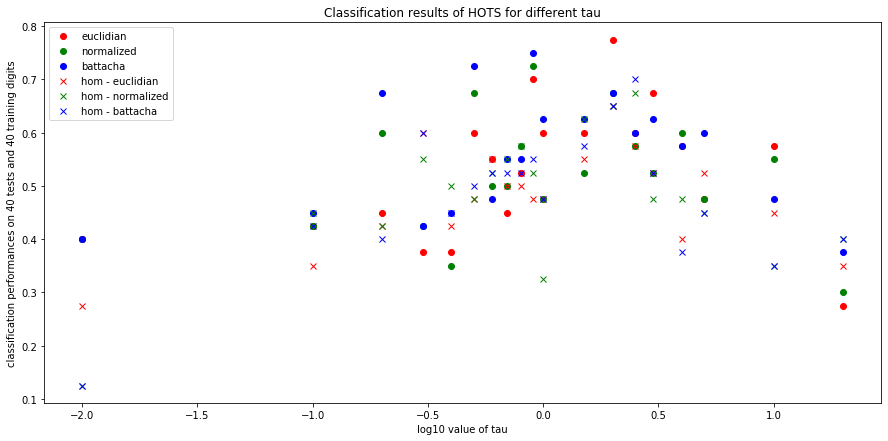

In [8]:
tauz = np.array([1e-5,1e-4,2e-4,3e-4,4e-4,5e-4,6e-4,7e-4,8e-4,9e-4,1e-3,1.5e-3,2e-3,2.5e-3,3e-3,4e-3,5e-3,1e-2,2e-2])
algo = 'lagorce'
hom = False

fig, ax = plt.subplots(figsize=(15,7));
ax.set_xlabel('log10 value of tau')
ax.set_ylabel('classification performances on 40 tests and 40 training digits')
ax.set_title("Classification results of HOTS for different tau")
colorz = ['red', 'green', 'blue']
accu = np.zeros([len(tauz),3])
for i in range(len(tauz)):
    tau = tauz[i]
    #timestr = time.strftime("%Y%m%d")
    timestr = '20201021'
    if hom==True:
        fname = 'Records/EXP_03_NMNIST/'+timestr+'_hots_'+str(tau*1000)+'ms_'+algo+'_homeo.pkl'
    else:
        fname = 'Records/EXP_03_NMNIST/'+timestr+'_hots_'+str(tau*1000)+'ms_'+algo+'.pkl'

    ClusterLayer, Classif0 = LoadObject(fname)
    prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN, to_print=False)
    accu[i][0]=accuracy[0]
    accu[i][1]=accuracy[1]
    accu[i][2]=accuracy[2]  
    print(tau,accu[i])
for j in range(3):
    ax.plot(np.log10(1000*tauz),accu.T[j],'o',color=colorz[j], label=method[j]); 

hom = True
accu = np.zeros([len(tauz),3])
for i in range(len(tauz)):
    tau = tauz[i]
    #timestr = time.strftime("%Y%m%d")
    timestr = '20201021'
    if hom==True:
        fname = 'Records/EXP_03_NMNIST/'+timestr+'_hots_'+str(tau*1000)+'ms_'+algo+'_homeo.pkl'
    else:
        fname = 'Records/EXP_03_NMNIST/'+timestr+'_hots_'+str(tau*1000)+'ms_'+algo+'.pkl'

    ClusterLayer, Classif0 = LoadObject(fname)
    prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN, to_print=False)
    accu[i][0]=accuracy[0]
    accu[i][1]=accuracy[1]
    accu[i][2]=accuracy[2]
    print('homeo',tau,accu[i])
for j in range(3):
    ax.plot(np.log10(1000*tauz),accu.T[j], 'x',color=colorz[j], label='hom - '+method[j]); 
ax.legend(loc='upper left');

In [ ]:
#tauz = np.array([1e-5,1e-4,2e-4,3e-4,4e-4,5e-4,6e-4,7e-4,8e-4,9e-4,1e-3,1.5e-3,2e-3,2.5e-3,3e-3,4e-3,5e-3,1e-2,2e-2])
tau = 9e-4
algo = 'lagorce'
hom = False
#timestr = time.strftime("%Y%m%d")
timestr = '20201021'
if hom==True:
    fname = 'Records/EXP_03_NMNIST/'+timestr+'_hots_'+str(tau*1000)+'ms_'+algo+'_homeo.pkl'
else:
    fname = 'Records/EXP_03_NMNIST/'+timestr+'_hots_'+str(tau*1000)+'ms_'+algo+'.pkl'

ClusterLayer, Classif0 = LoadObject(fname)
prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN, to_print=True)

DisplaySurface2D(ClusterLayer[0].prototype, nb_polarities=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)

DisplayConvergence(ClusterLayer, to_display=["error", "histo"])

In [ ]:
homrun=False
NbClusteringData = 15
NbTrainingData = 40
NbTestingData = 40
event_tr, event_te, event_cl, label_tr, label_te = LoadNMNIST(
NbTrainingData, NbTestingData, NbClusteringData, Path=DataPath, OutOnePolarity=False, ListPolarities=None, verbose=0)

event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer, homrun=homrun)
        ## Generating histogram for the test samples
event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer, homrun=homrun)

Classif0 = Classifier(
            event0_o_tr, event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te
        )
prediction, accuracy, method = Classif0.HistogramDistance(knn=6, to_print=True)

In [5]:
for i in range(1):
    print(i)

0
